# E-commerce Customer Churn Analysis and Prediction

Group11
Xinyu Cao 305867589

Ruoxi Wang 105857765

Junyue Wu 805863348

Yuhan Zhang 005863578

## Data Quality Report

**DATA DICTIONARY**<br/>
There are 19 variables in total, the detailed descriptions are listed below:

$CustomerID$: Unique customer ID<br/>
$Churn$: Churn Flag<br/>
$Tenure$: Tenure of customer in organization<br/>
$PreferredLoginDevice$: Preferred login device of customer<br/>
$CityTier$: City tier<br/>
$WarehouseToHome$: Distance in between warehouse to home of customer<br/>
$PreferredPaymentMode$: Preferred payment method of customer<br/>
$Gender$: Gender of customer<br/>
$HourSpendOnApp$: Number of hours spend on mobile application or website<br/>
$NumberOfDeviceRegistered$: Total number of deceives is registered on particular customer<br/>
$PreferedOrderCat$: Preferred order category of customer in last month<br/>
$SatisfactionScore$: Satisfactory score of customer on service<br/>
$MaritalStatus$: Marital status of customer<br/>
$NumberOfAddress$: Total number of added address on particular customer<br/>
$Complain$: Any complaint has been raised in last month<br/>
$OrderAmountHikeFromlastYear$: Percentage increases in order from last year<br/>
$CouponUsed$: Total number of coupon has been used in last month<br/>
$OrderCount$: Total number of orders has been places in last month<br/>
$DaySinceLastOrder$: Day Since last order by customer<br/>
$CashbackAmount$: Average cashback in last month<br/>
<br/>
Data Reference:[Kaggle Dataset](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction)

**Import Library**

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import openpyxl

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display, Markdown, Latex, clear_output

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report,accuracy_score, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

**Data Loading**

In [ ]:
# Load Ecommerce dataset
data = pd.read_csv('/Cleaned_ECommerce.csv')
data.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1.0,4.0,Mobile Phone,3.0,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93
1,1.0,9.0,Mobile Phone,1.0,8.0,UPI,Male,3.0,4.0,Mobile Phone,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90
2,1.0,9.0,Mobile Phone,1.0,30.0,Debit Card,Male,2.0,4.0,Mobile Phone,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28
3,1.0,0.0,Mobile Phone,3.0,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07
4,1.0,0.0,Mobile Phone,1.0,12.0,Credit Card,Male,3.0,3.0,Mobile Phone,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   float64
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   float64
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   float64
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   float64
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

In [ ]:
data.describe() 

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,0.168384,10.134103,1.654707,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.223030
std,0.374240,8.357951,0.915389,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


**Identify numeric and categorical varibales**

In [ ]:
Numeric = data.select_dtypes("number").copy()
Categorical = data.select_dtypes("object").copy()
print("Numeric Variables: ",Numeric.columns,"\n","Categorical Variables: ",Categorical.columns)

Numeric Variables:  Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object') 
 Categorical Variables:  Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


## Explainatory Data Analysis

**We then explore the numerical and categorical variables in the following analysis**

#### Exploring Numeric Variables

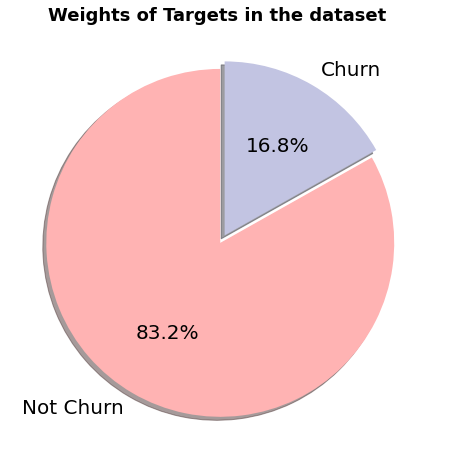

In [ ]:
# explore response variable "Churn"
labels = ['Not Churn', 'Churn']
sizes = data['Churn'].value_counts(sort = True)

colors = ["#ffb3b3","#C2C4E2"]
explode = (0.05,0) 
 
plt.figure(figsize=(8,8))
plt.suptitle("Weights of Targets in the dataset",y=0.9, size=18, weight='bold')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":20})

plt.show()

In [ ]:
# !pip install matplotlib==3.5.2

Text(0.5, 0, 'Churn Flag')

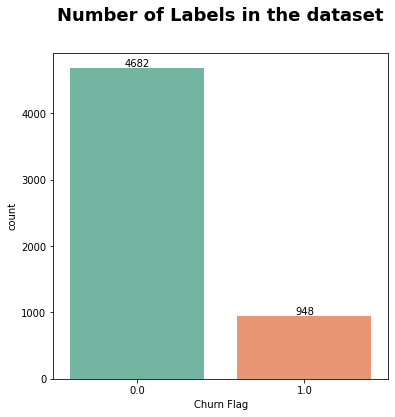

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))

ax.set_title('Number of Labels in the dataset',y=1.08, size=18, weight='bold')
sns.countplot(x=Numeric['Churn'],order=Numeric['Churn'].value_counts(ascending=False).index, palette = 'Set2',ax = ax)

abs_values = Numeric['Churn'].value_counts(ascending=False)
rel_values = Numeric['Churn'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]}' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_xlabel("Churn Flag")

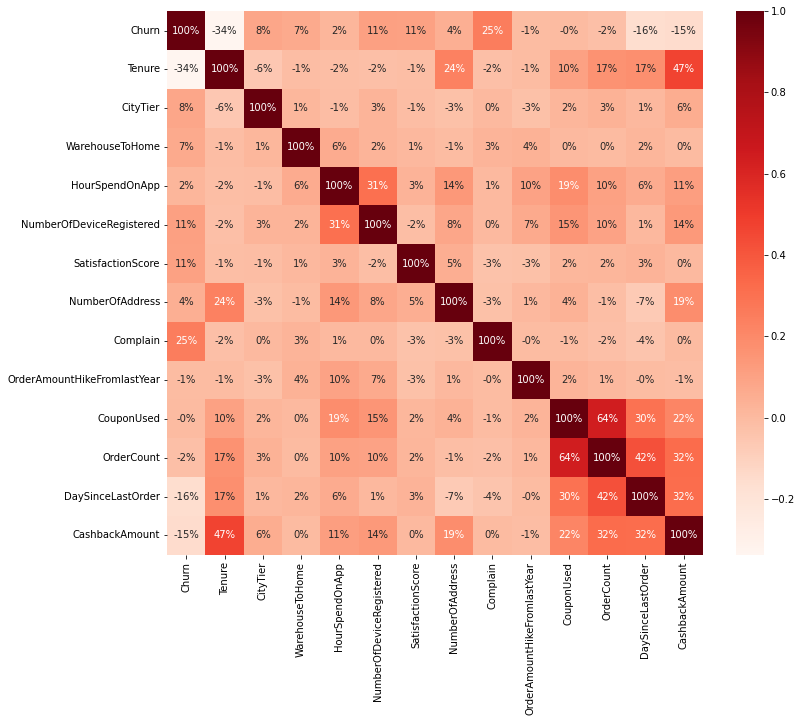

In [ ]:
ax = plt.figure(figsize=(12,10))
sns.heatmap(Numeric.corr(),annot=True,cmap="Reds", fmt='.0%')
plt.show()

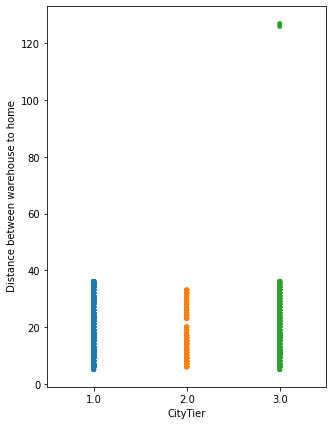

In [ ]:
df = data.copy()

df['CityTier'].astype('str')
plt.figure(figsize = (5,7))
sns.stripplot(x = 'CityTier', y = 'WarehouseToHome', data = df, jitter = False)
plt.ylabel(' Distance between warehouse to home');

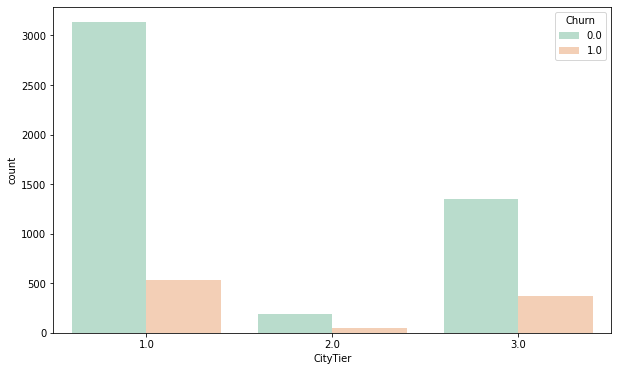

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'CityTier', hue=data['Churn'], data = data, palette = 'Pastel2');

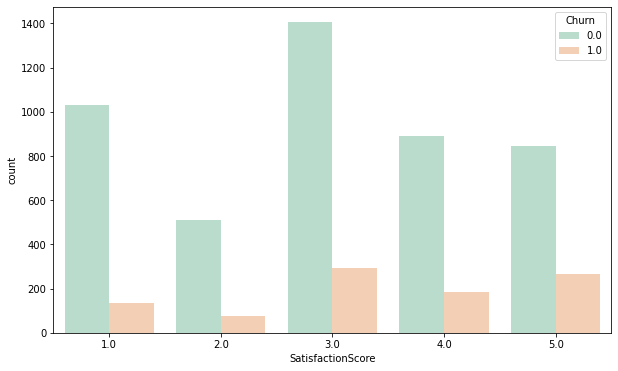

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'SatisfactionScore', hue=data['Churn'], data = data, palette = 'Pastel2');

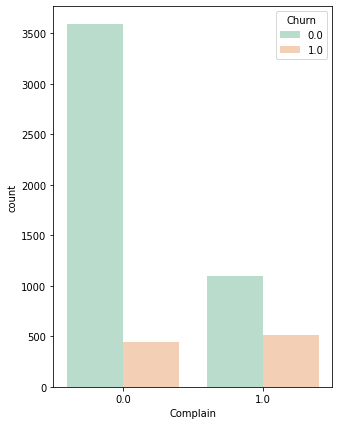

In [ ]:
plt.figure(figsize = (5,7))
sns.countplot(x  = 'Complain', hue=data['Churn'], data = data, palette = 'Pastel2');

<AxesSubplot:xlabel='HourSpendOnApp', ylabel='Count'>

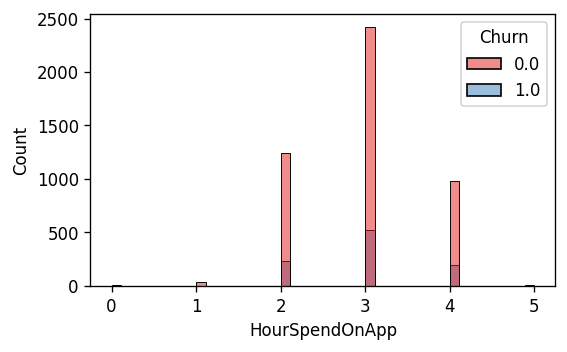

In [ ]:
plt.figure(figsize=(5,3),dpi=120)
sns.histplot(x=data['HourSpendOnApp'],hue=data['Churn'],palette='Set1')

#### Exploring Categorical Variables


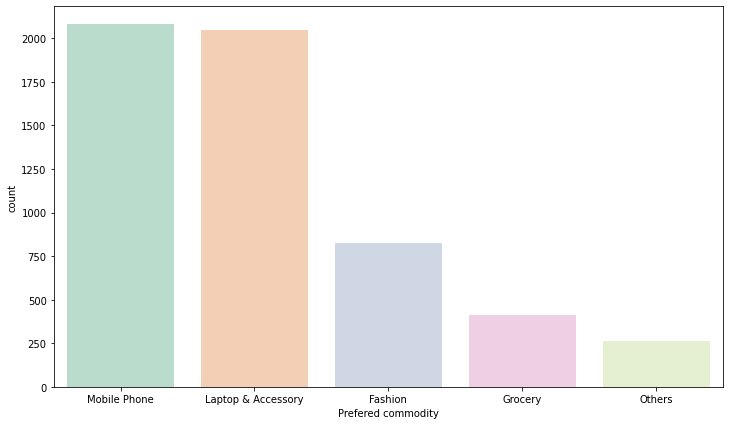

In [ ]:
plt.figure(figsize = (12,7))
sns.countplot(x ='PreferedOrderCat', data = data,
              palette = 'Pastel2',
              order = data['PreferedOrderCat'].value_counts().index) 
plt.xlabel('Prefered commodity');

In [ ]:
df1  =data['PreferredPaymentMode'].value_counts().reset_index()
df1.columns = ['mode', 'count']
df1

import plotly.express as px
fig = px.treemap(df1, path = ['mode'],
                 values = 'count', 
                 color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

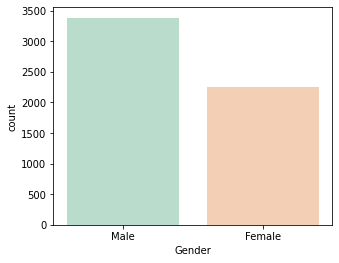

In [ ]:
plt.figure(figsize = (5,4))
sns.countplot(x ='Gender', data = data,
              palette = 'Pastel2',
              order = data['Gender'].value_counts().index) 
plt.xlabel('Gender');

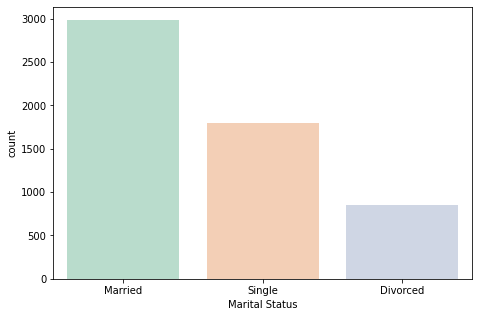

In [ ]:
plt.figure(figsize = (7.5,5))
sns.countplot(x ='MaritalStatus', data = data,
              palette = 'Pastel2',
              order = data['MaritalStatus'].value_counts().index) 
plt.xlabel('Marital Status');

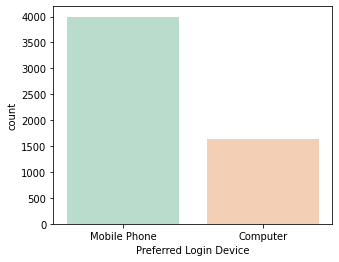

In [ ]:
plt.figure(figsize = (5,4))
sns.countplot(x ='PreferredLoginDevice', data = data,
              palette = 'Pastel2',
              order = data['PreferredLoginDevice'].value_counts().index) 
plt.xlabel('Preferred Login Device');

## Model Building

**Data Processing and Partitioning**

**Scaling the numerical features**<br/>

Different features have different magnitude. Fitting our model without normalizing could give us misleading feature importance.

In [ ]:
# Using MinMaxScaler to scale values all between 0 and 1 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[Numeric.columns])
data[Numeric.columns] = scaler.transform(data[Numeric.columns])

In [ ]:
data[Numeric.columns]

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1.0,0.065574,1.0,0.008197,0.6,0.4,0.25,0.380952,1.0,0.000000,0.0625,0.000000,0.108696,0.492107
1,1.0,0.147541,0.0,0.024590,0.6,0.6,0.50,0.285714,1.0,0.266667,0.0000,0.000000,0.000000,0.372011
2,1.0,0.147541,0.0,0.204918,0.4,0.6,0.50,0.238095,1.0,0.200000,0.0000,0.000000,0.065217,0.370104
3,1.0,0.000000,1.0,0.081967,0.4,0.6,1.00,0.333333,0.0,0.800000,0.0000,0.000000,0.065217,0.412536
4,1.0,0.000000,0.0,0.057377,0.6,0.4,1.00,0.095238,0.0,0.000000,0.0625,0.000000,0.065217,0.398782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.0,0.163934,0.0,0.204918,0.6,0.2,0.00,0.238095,0.0,0.466667,0.0625,0.066667,0.086957,0.463737
5626,0.0,0.213115,0.0,0.065574,0.6,0.8,1.00,0.238095,0.0,0.333333,0.0625,0.066667,0.065217,0.692052
5627,0.0,0.016393,0.0,0.049180,0.6,0.2,0.75,0.095238,1.0,0.666667,0.0625,0.066667,0.086957,0.573618
5628,0.0,0.377049,1.0,0.032787,0.8,0.8,0.75,0.142857,0.0,0.266667,0.1250,0.066667,0.195652,0.550478


**Encoding the categorical feature**<br/>

We will use One-Hot Encoding in this case.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
encoder.fit(data[Categorical.columns])
encoded_cols = list(encoder.get_feature_names_out(Categorical.columns))
print(encoded_cols)
data[encoded_cols] = encoder.transform(data[Categorical.columns])

['PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_Cash on Delivery', 'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI', 'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']


**Splitting the training set and test set**

In [ ]:
X = data[list(Numeric.columns) + encoded_cols].copy()
X.drop('Churn', axis =1, inplace = True)
y = data.Churn.copy()

X.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.065574,1.0,0.008197,0.6,0.4,0.25,0.380952,1.0,0.000000,0.0625,0.0,0.108696,0.492107,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.147541,0.0,0.024590,0.6,0.6,0.50,0.285714,1.0,0.266667,0.0000,0.0,0.000000,0.372011,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.147541,0.0,0.204918,0.4,0.6,0.50,0.238095,1.0,0.200000,0.0000,0.0,0.065217,0.370104,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.000000,1.0,0.081967,0.4,0.6,1.00,0.333333,0.0,0.800000,0.0000,0.0,0.065217,0.412536,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.0,0.057377,0.6,0.4,1.00,0.095238,0.0,0.000000,0.0625,0.0,0.065217,0.398782,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

### 1. Fitting Baseline on Imbalanced Data

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
print("The training accuracy score is ",accuracy_score(y_train, LR.predict(X_train)))
print("The test accuracy score is ",accuracy_score(y_test, LR.predict(X_test)))

The training accuracy score is  0.8911443795990865
The test accuracy score is  0.8845470692717584


Our basline model has been doing quite well in terms of the accuracy score.<br/> 

However, this high accuracy score somehow could be misleading. Since we have a super imbalanced data, the high accuracy score may only suggest that our model is good at predicting the most common label.

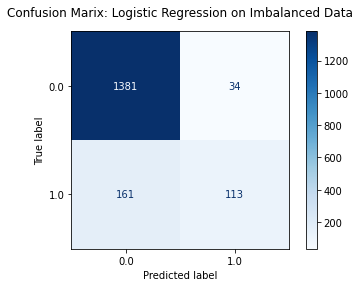

In [ ]:
plot_confusion_matrix(LR, X_test, y_test, display_labels= LR.classes_, cmap= "Blues", normalize= None)
plt.title("Confusion Marix: Logistic Regression on Imbalanced Data",fontsize = 12, pad=15)
plt.show()

In [ ]:
# Look at other metrics
print(classification_report(y_test, LR.predict(X_test), digits=3))

              precision    recall  f1-score   support

         0.0      0.896     0.976     0.934      1415
         1.0      0.769     0.412     0.537       274

    accuracy                          0.885      1689
   macro avg      0.832     0.694     0.735      1689
weighted avg      0.875     0.885     0.870      1689



For the minority label 1, we could see that the presision rate is not that high, while the recall rate is even worse, pretty low as only 41.2%. This suggests our baseline has a really bad performance in finding those who would leave.<br/>

In the following, we would try to solve the problem by dealing with imbalanced data and use more models to compare.

### 2. Data Augmentation

To deal with the problem of imbalanced data, traditional ways would be:<br>
1) Oversampling from the minority class.<br/>
2) Undersamping from the majority class.<br/>
3) Using **SMOTE** to create synthesized data.<br/>

Here we choose 3) to build up our training set.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_train_ow, y_train_ow = smote.fit_resample(X_train, y_train)

In [ ]:
# !pip install matplotlib==3.5.2

Text(0.5, 0, 'Churn Flag')

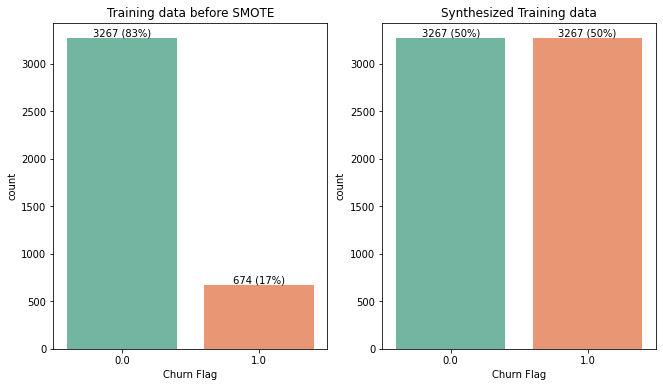

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10.8,6))

# Left Plot
ax[0].set_title('Training data before SMOTE')
sns.countplot(x=y_train,order=y_train.value_counts(ascending=False).index, palette = 'Set2',ax = ax[0])

abs_values = y_train.value_counts(ascending=False)
rel_values = y_train.value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax[0].bar_label(container=ax[0].containers[0], labels=lbls)
ax[0].set_xlabel("Churn Flag")

# Right Plot
ax[1].set_title('Synthesized Training data')
sns.countplot(x=y_train_ow,order=y_train_ow.value_counts(ascending=False).index, palette = 'Set2',ax = ax[1])

abs_values_ = y_train_ow.value_counts(ascending=False)
rel_values_ = y_train_ow.value_counts(ascending=False, normalize=True).values * 100
lbls_ = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values_, rel_values_)]

ax[1].bar_label(container=ax[1].containers[0], labels=lbls_)
ax[1].set_xlabel("Churn Flag")

The synthesized training data now has balanced labels.

### 3. Fitting on Synthesized Data

#### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
LR_ow = LogisticRegressionCV(cv=5, random_state=0).fit(X_train_ow, y_train_ow)
print("The training accuracy score is ",accuracy_score(y_train_ow, LR_ow.predict(X_train_ow)))
print("The test accuracy score is ",accuracy_score(y_test, LR_ow.predict(X_test)))

The training accuracy score is  0.8310376492194674
The test accuracy score is  0.8087625814091178


In [ ]:
## Performance Matrix on train data set
predict_LR = LR_ow.predict(X_train_ow)
LR_score = LR_ow.score(X_train_ow, y_train_ow)
print(LR_score)
print(metrics.classification_report(y_train_ow, predict_LR))

0.8310376492194674
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      3267
         1.0       0.82      0.85      0.83      3267

    accuracy                           0.83      6534
   macro avg       0.83      0.83      0.83      6534
weighted avg       0.83      0.83      0.83      6534



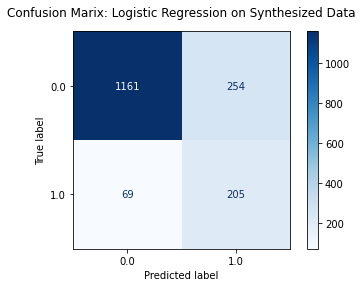

In [ ]:
plot_confusion_matrix(LR_ow, X_test, y_test, display_labels= LR_ow.classes_, cmap= "Blues", normalize= None)
plt.title("Confusion Marix: Logistic Regression on Synthesized Data",fontsize = 12, pad=15)
plt.show()

In [ ]:
# Look at other metrics
print(classification_report(y_test, LR_ow.predict(X_test), digits=3))

              precision    recall  f1-score   support

         0.0      0.944     0.820     0.878      1415
         1.0      0.447     0.748     0.559       274

    accuracy                          0.809      1689
   macro avg      0.695     0.784     0.719      1689
weighted avg      0.863     0.809     0.826      1689



#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

**Hyperparameters Tuning**

In [ ]:
# Use GridSearchCV for searching over parameter
RF = RandomForestClassifier(random_state = 0)
Parameters = [{ 'n_estimators': list(np.arange(50,550,50)),'max_features': [5,10,20,30]}]
RF_CV = GridSearchCV(RF, param_grid = Parameters, cv=10, scoring='accuracy', return_train_score=True, n_jobs=-1)
RF_CV.fit(X_train_ow, y_train_ow)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid=[{'max_features': [5, 10, 20, 30],
                          'n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                           400, 450, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
print('Best Parameter n_estimators = %.0f and max_features = %.0f' % (list(RF_CV.best_params_.values())[1], list(RF_CV.best_params_.values())[0]))
print('Best cross-validation accuracy = %.2f' % (100 * RF_CV.best_score_))

Best Parameter n_estimators = 500 and max_features = 5
Best cross-validation accuracy = 97.75


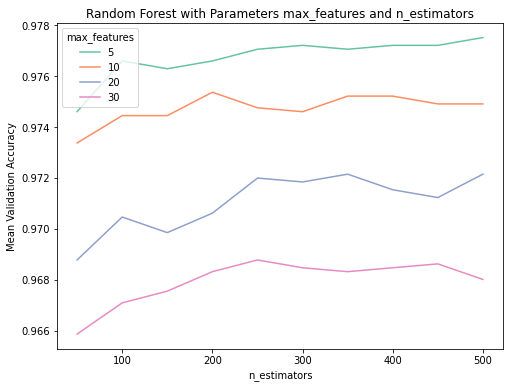

In [ ]:
RF_CV_df = pd.DataFrame(RF_CV.cv_results_)[['param_max_features','param_n_estimators','mean_test_score']]

plt.figure(figsize = (8,6))
plt.title("Random Forest with Parameters max_features and n_estimators")
sns.lineplot(data = RF_CV_df,x = "param_n_estimators",y = "mean_test_score", hue = "param_max_features",palette = "Set2")
plt.xlabel("n_estimators")
plt.ylabel("Mean Validation Accuracy")
plt.legend(title = "max_features")
plt.show()

In [ ]:
RF_model=RandomForestClassifier(n_estimators=500, max_features = 5, random_state=0)
RF_model.fit(X_train_ow, y_train_ow)

RandomForestClassifier(max_features=5, n_estimators=500, random_state=0)

In [ ]:
## Performance Matrix on train data set
predict_RF = RF_model.predict(X_train_ow)
model_RF =RF_model.score(X_train_ow, y_train_ow)
# print("The training accuracy score is ",accuracy_score(y_train_ow, RF_model.predict(X_train_ow)))
print("The training accuracy score is ",str(model_RF))

print(metrics.classification_report(y_train_ow, predict_RF))

The training accuracy score is  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3267
         1.0       1.00      1.00      1.00      3267

    accuracy                           1.00      6534
   macro avg       1.00      1.00      1.00      6534
weighted avg       1.00      1.00      1.00      6534



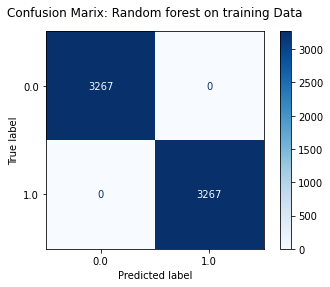

In [ ]:
#confusion matrix on training Data
plot_confusion_matrix(RF_model,X_train_ow, y_train_ow, display_labels= RF_model.classes_, cmap= "Blues", normalize= None)
plt.title("Confusion Marix: Random forest on training Data",fontsize = 12, pad=15)
plt.show()

In [ ]:
## Performance Matrix on test data set
print("The testing score is ",accuracy_score(y_test,RF_model.predict(X_test)))
print(classification_report(y_test, RF_model.predict(X_test), digits=3))

The testing score is  0.9508584961515689
              precision    recall  f1-score   support

         0.0      0.959     0.984     0.971      1415
         1.0      0.903     0.781     0.838       274

    accuracy                          0.951      1689
   macro avg      0.931     0.882     0.904      1689
weighted avg      0.950     0.951     0.949      1689



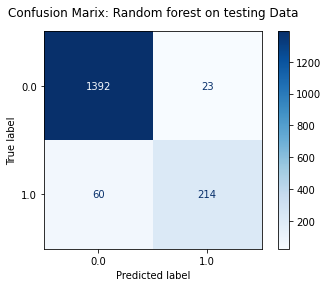

In [ ]:
#confusion matrix on testing Data
plot_confusion_matrix(RF_model, X_test, y_test, display_labels= RF_model.classes_, cmap= "Blues", normalize= None)
plt.title("Confusion Marix: Random forest on testing Data",fontsize = 12, pad=15)
plt.show()

In [ ]:
importance_df = pd.DataFrame({'feature':X_train_ow.columns,
                            'Importance': RF_model.feature_importances_}).sort_values('Importance', ascending = False)
importance_df.head(10)

,feature,Importance
0,Tenure,0.205571
7,Complain,0.085438
12,CashbackAmount,0.066209
11,DaySinceLastOrder,0.063885
4,NumberOfDeviceRegistered,0.056197
6,NumberOfAddress,0.055009
2,WarehouseToHome,0.048519
5,SatisfactionScore,0.045173
8,OrderAmountHikeFromlastYear,0.040576
10,OrderCount,0.039897


Text(0.5, 1.0, 'Feature Importance for random forest')

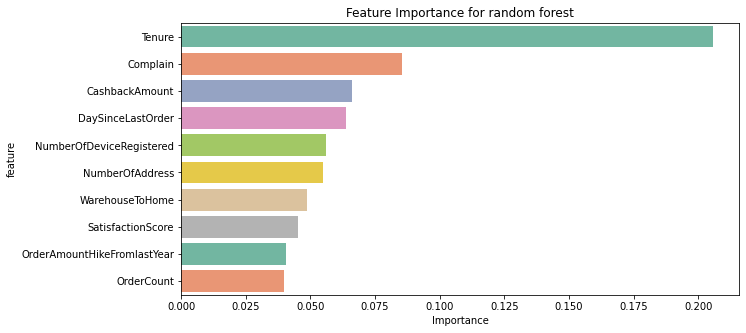

In [ ]:
plt.figure(figsize=(10,5))

sns.barplot(data = importance_df.head(10), x = 'Importance', y = 'feature', palette = 'Set2');
plt.title('Feature Importance for random forest')

Boosting

Using gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_ow, y_train_ow)

GradientBoostingClassifier()

In [ ]:
# Training score
predict_gbc_train = gbc.predict(X_train_ow)
model_gbc =gbc.score(X_train_ow, y_train_ow)
print("Training score for gradient boosting classifier: " + str(model_gbc))
#Performance Matrix on training data set
print(metrics.classification_report(y_train_ow, predict_gbc_train))


Training score for gradient boosting classifier: 0.9504132231404959
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      3267
         1.0       0.95      0.95      0.95      3267

    accuracy                           0.95      6534
   macro avg       0.95      0.95      0.95      6534
weighted avg       0.95      0.95      0.95      6534



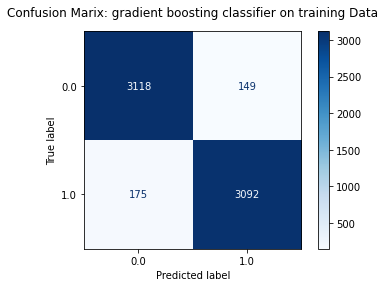

In [ ]:
#confusion matrix training Data
plot_confusion_matrix(gbc, X_train_ow, y_train_ow, display_labels= gbc.classes_, cmap= "Blues", normalize= None)
plt.title("Confusion Marix: gradient boosting classifier on training Data",fontsize = 12, pad=15)
plt.show()

In [ ]:
# Tesing score
predict_gbc = gbc.predict(X_test)
model_gbc =gbc.score(X_test, y_test)
print("Testing score for gradient boosting classifier: " + str(model_gbc))
# Performance Matrix on testing data set
print(metrics.classification_report(y_test, gbc.predict(X_test), digits=3))


Testing score for gradient boosting classifier: 0.9005328596802842
              precision    recall  f1-score   support

         0.0      0.942     0.939     0.941      1415
         1.0      0.691     0.701     0.696       274

    accuracy                          0.901      1689
   macro avg      0.816     0.820     0.818      1689
weighted avg      0.901     0.901     0.901      1689



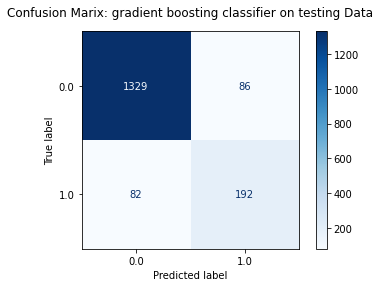

In [ ]:
#confusion matrix for testing Data
plot_confusion_matrix(gbc, X_test, y_test, display_labels= gbc.classes_, cmap= "Blues", normalize= None)
plt.title("Confusion Marix: gradient boosting classifier on testing Data",fontsize = 12, pad=15)
plt.show()

In [ ]:
importance_gbc = pd.DataFrame({'feature':X_train_ow.columns,
                            'Importance': gbc.feature_importances_}).sort_values('Importance', ascending = False)
importance_gbc.head(10)


,feature,Importance
0,Tenure,0.400348
7,Complain,0.120541
4,NumberOfDeviceRegistered,0.074276
6,NumberOfAddress,0.062990
11,DaySinceLastOrder,0.049480
5,SatisfactionScore,0.035233
9,CouponUsed,0.034225
12,CashbackAmount,0.030246
25,PreferedOrderCat_Mobile Phone,0.029780
24,PreferedOrderCat_Laptop & Accessory,0.026248


<Figure size 720x360 with 0 Axes>

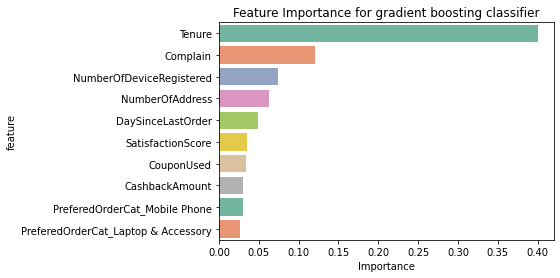

<Figure size 720x360 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = importance_gbc.head(10), x = 'Importance', y = 'feature', palette = 'Set2');
plt.title('Feature Importance for gradient boosting classifier')

Using xgboot(more regularized form of Gradient Boosting.)

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train_ow, y_train_ow)

XGBClassifier()

In [ ]:
# Training score
predict_xgbc_train = xgbc.predict(X_train_ow)
model_xgbc =xgbc.score(X_train_ow, y_train_ow)
print("Training score for xgboost classifier: " + str(model_xgbc))


Training score for xgboost classifier: 0.9453627180899908


In [ ]:
#Performance Matrix on training data set

print(metrics.classification_report(y_train_ow, predict_xgbc_train))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      3267
         1.0       0.95      0.94      0.95      3267

    accuracy                           0.95      6534
   macro avg       0.95      0.95      0.95      6534
weighted avg       0.95      0.95      0.95      6534



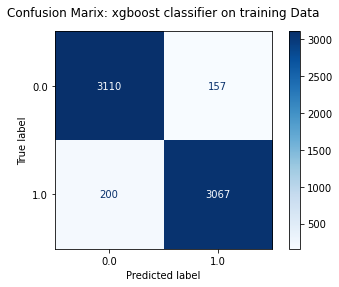

In [ ]:
#confusion matrix training Data
plot_confusion_matrix(xgbc, X_train_ow, y_train_ow, display_labels= xgbc.classes_, cmap= "Blues", normalize= None)
plt.title("Confusion Marix: xgboost classifier on training Data",fontsize = 12, pad=15)
plt.show()

In [ ]:
# Tesing score
predict_xgbc = xgbc.predict(X_test)
model_xgbc =xgbc.score(X_test, y_test)
print("Testing score for xgboost classifier: " + str(model_xgbc))


Testing score for xgboost classifier: 0.8957963291888692


In [ ]:
# Performance Matrix on testing data set
print(metrics.classification_report(y_test, xgbc.predict(X_test), digits=3))

              precision    recall  f1-score   support

         0.0      0.939     0.936     0.938      1415
         1.0      0.676     0.686     0.681       274

    accuracy                          0.896      1689
   macro avg      0.808     0.811     0.809      1689
weighted avg      0.896     0.896     0.896      1689



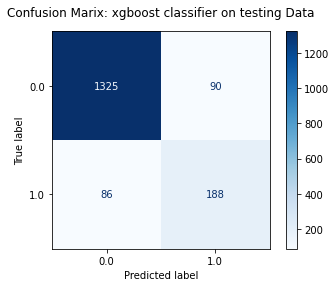

In [ ]:
#confusion matrix for testing Data
plot_confusion_matrix(xgbc, X_test, y_test, display_labels= xgbc.classes_, cmap= "Blues", normalize= None)
plt.title("Confusion Marix: xgboost classifier on testing Data",fontsize = 12, pad=15)
plt.show()

In [ ]:
importance_xgbc = pd.DataFrame({'feature':X_train_ow.columns,
                            'Importance': xgbc.feature_importances_}).sort_values('Importance', ascending = False)
importance_xgbc.head(10)

,feature,Importance
0,Tenure,0.113056
25,PreferedOrderCat_Mobile Phone,0.104800
7,Complain,0.086586
4,NumberOfDeviceRegistered,0.076279
29,MaritalStatus_Single,0.054712
3,HourSpendOnApp,0.054167
24,PreferedOrderCat_Laptop & Accessory,0.052864
6,NumberOfAddress,0.039635
11,DaySinceLastOrder,0.038574
9,CouponUsed,0.036904


Text(0.5, 1.0, 'Feature Importance for xgboost classifier')

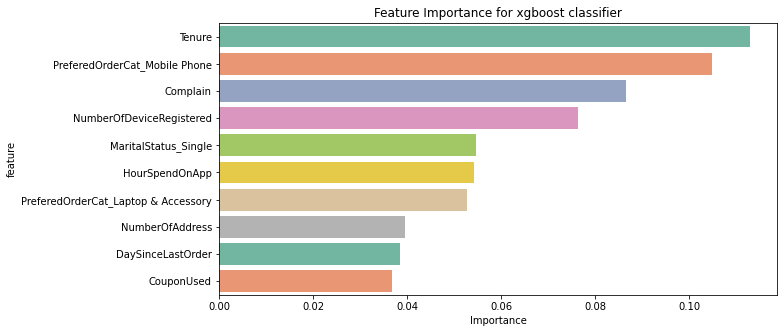

In [ ]:
plt.figure(figsize=(10,5))

sns.barplot(data = importance_xgbc.head(10), x = 'Importance', y = 'feature', palette = 'Set2');
plt.title('Feature Importance for xgboost classifier')

#### XGBoost<br/>
**parameter tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV

xgbc_model = XGBClassifier()

gs = GridSearchCV(xgbc_model,
                  param_grid = {'max_depth': range(3, 10),
                                'learning_rate':(0.1,0.5,1),
                                'n_estimators': (500, 1000),
                                'gamma': range(0,2)
                                },
                  cv=5,
                  n_jobs=1,
                  scoring='accuracy')

gs.fit(X_train_ow, y_train_ow)

print(gs.best_params_)
print(gs.best_score_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500}
-0.9597531726326963


In [ ]:
tuned_xgbc = XGBClassifier(max_depth=9,n_estimators = 500,learning_rate = 0.1,gamma = 0, random_state=0)
tuned_xgbc.fit(X_train_ow, y_train_ow)
predict_xgbc_train = tuned_xgbc.predict(X_train_ow)
model_xgbc =tuned_xgbc.score(X_train_ow, y_train_ow)
print("Training score for Tuned xgboost classifier: " + str(model_xgbc))
# Tesing score
predict_xgbc = tuned_xgbc.predict(X_test)
model_xgbc =tuned_xgbc.score(X_test, y_test)
print("Testing score for Tuned xgboost classifier: " + str(model_xgbc))

Training score for Tuned xgboost classifier: 1.0
Testing score for Tuned xgboost classifier: 0.9644760213143873


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3267
         1.0       1.00      1.00      1.00      3267

    accuracy                           1.00      6534
   macro avg       1.00      1.00      1.00      6534
weighted avg       1.00      1.00      1.00      6534



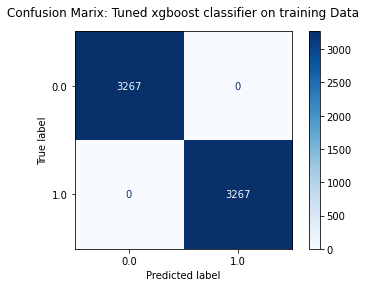

In [ ]:
#Performance Matrix on training data set

print(metrics.classification_report(y_train_ow, predict_xgbc_train))
#confusion matrix training Data
plot_confusion_matrix(tuned_xgbc, X_train_ow, y_train_ow, display_labels= tuned_xgbc.classes_, cmap= "Blues", normalize= None)
plt.title("Confusion Marix: Tuned xgboost classifier on training Data",fontsize = 12, pad=15)
plt.show()

              precision    recall  f1-score   support

         0.0      0.976     0.982     0.979      1415
         1.0      0.902     0.876     0.889       274

    accuracy                          0.964      1689
   macro avg      0.939     0.929     0.934      1689
weighted avg      0.964     0.964     0.964      1689



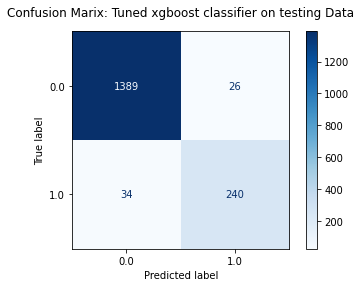

In [ ]:
# Performance Matrix on testing data set
print(metrics.classification_report(y_test, tuned_xgbc.predict(X_test), digits=3))
#confusion matrix for testing Data
plot_confusion_matrix(tuned_xgbc, X_test, y_test, display_labels= tuned_xgbc.classes_, cmap= "Blues", normalize= None)
plt.title("Confusion Marix: Tuned xgboost classifier on testing Data",fontsize = 12, pad=15)
plt.show()

In [ ]:
importance_xgbc = pd.DataFrame({'feature':X_train_ow.columns,
                            'Importance': tuned_xgbc.feature_importances_}).sort_values('Importance', ascending = False)
importance_xgbc.head(10)

,feature,Importance
25,PreferedOrderCat_Mobile Phone,0.130755
0,Tenure,0.123495
7,Complain,0.118342
23,PreferedOrderCat_Grocery,0.091920
24,PreferedOrderCat_Laptop & Accessory,0.043215
4,NumberOfDeviceRegistered,0.039635
15,PreferredPaymentMode_Cash on Delivery,0.039361
29,MaritalStatus_Single,0.034569
22,PreferedOrderCat_Fashion,0.034268
6,NumberOfAddress,0.033523


Text(0.5, 1.0, 'Feature Importance for Tuned xgboost classifier')

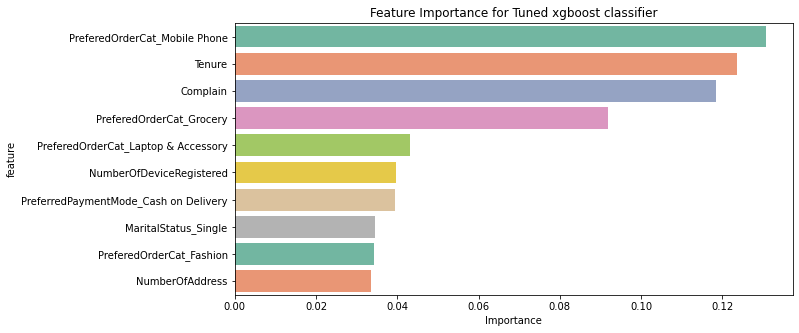

In [ ]:
plt.figure(figsize=(10,5))

sns.barplot(data = importance_xgbc.head(10), x = 'Importance', y = 'feature', palette = 'Set2');
plt.title('Feature Importance for Tuned xgboost classifier')

#### Gradient boosting<br/>
**parameter tunning**

In [ ]:
gbc_model = GradientBoostingClassifier()

gs = GridSearchCV(gbc_model,
                  param_grid = {'max_depth': range(3, 10),
                                'learning_rate':(0.1,0.5,1),
                                'n_estimators': (500, 1000),
                                },
                  cv=5,
                  n_jobs=1,
                  scoring='accuracy',verbose=1)

gs.fit(X_train_ow, y_train_ow)

print(gs.best_params_)
print(gs.best_score_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}
0.9681703303334267


In [ ]:
tuned_gbc = GradientBoostingClassifier(max_depth =9,random_state = 0,n_estimators=1000,learning_rate =0.1 )
tuned_gbc.fit(X_train_ow, y_train_ow)
# Training score
predict_gbc_train = tuned_gbc.predict(X_train_ow)
model_gbc =tuned_gbc.score(X_train_ow, y_train_ow)
print("Training score for tuned gradient boosting classifier: " + str(model_gbc))
# Tesing score
predict_gbc = tuned_gbc.predict(X_test)
model_gbc =tuned_gbc.score(X_test, y_test)
print("Testing score for Tuned gradient boosting classifier: " + str(model_gbc))

Training score for tuned gradient boosting classifier: 1.0
Testing score for Tuned gradient boosting classifier: 0.9644760213143873


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3267
         1.0       1.00      1.00      1.00      3267

    accuracy                           1.00      6534
   macro avg       1.00      1.00      1.00      6534
weighted avg       1.00      1.00      1.00      6534



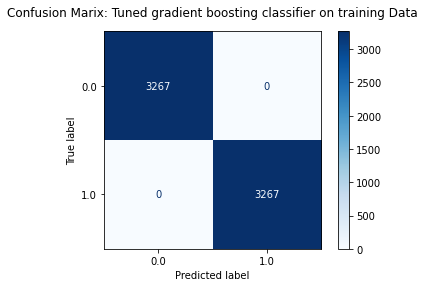

In [ ]:
#Performance Matrix on training data set
print(metrics.classification_report(y_train_ow, predict_gbc_train))
#confusion matrix training Data
plot_confusion_matrix(tuned_gbc, X_train_ow, y_train_ow, display_labels= gbc.classes_, cmap= "Blues", normalize= None)
plt.title("Confusion Marix: Tuned gradient boosting classifier on training Data",fontsize = 12, pad=15)
plt.show()

              precision    recall  f1-score   support

         0.0      0.974     0.984     0.979      1415
         1.0      0.912     0.865     0.888       274

    accuracy                          0.964      1689
   macro avg      0.943     0.924     0.933      1689
weighted avg      0.964     0.964     0.964      1689



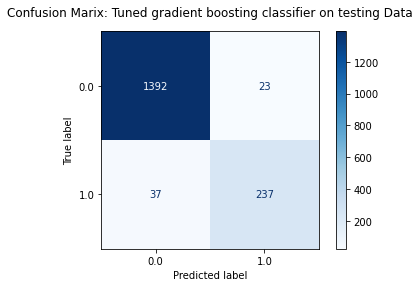

In [ ]:
# Performance Matrix on testing data set
print(metrics.classification_report(y_test, tuned_gbc.predict(X_test), digits=3))
#confusion matrix for testing Data
plot_confusion_matrix(tuned_gbc, X_test, y_test, display_labels= tuned_gbc.classes_, cmap= "Blues", normalize= None)
plt.title("Confusion Marix: Tuned gradient boosting classifier on testing Data",fontsize = 12, pad=15)
plt.show()

In [ ]:
importance_gbc = pd.DataFrame({'feature':X_train_ow.columns,
                            'Importance': tuned_gbc.feature_importances_}).sort_values('Importance', ascending = False)
importance_gbc.head(10)

,feature,Importance
0,Tenure,0.297462
7,Complain,0.106748
6,NumberOfAddress,0.083263
12,CashbackAmount,0.053647
11,DaySinceLastOrder,0.052197
2,WarehouseToHome,0.045097
4,NumberOfDeviceRegistered,0.044788
25,PreferedOrderCat_Mobile Phone,0.044401
5,SatisfactionScore,0.036143
29,MaritalStatus_Single,0.032648


Text(0.5, 1.0, 'Feature Importance for Tuned gradient boosting classifier')

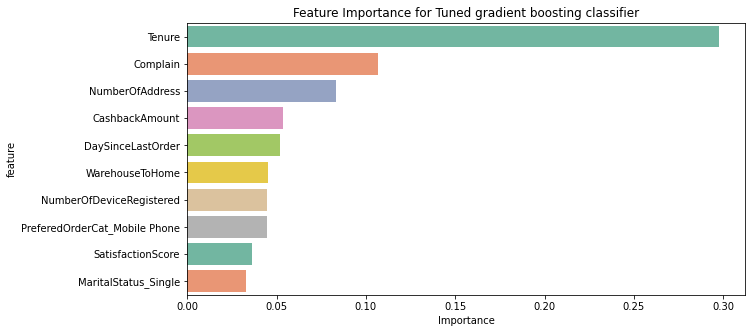

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = importance_gbc.head(10), x = 'Importance', y = 'feature', palette = 'Set2');
plt.title('Feature Importance for Tuned gradient boosting classifier')

##Model Comparison

#### ROC and AUC 

In [ ]:
## Comparision of Performance of all Algorithms
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
p1 = LR_ow.predict_proba(X_test)
p2 = RF_model.predict_proba(X_test)
p3 = tuned_xgbc.predict_proba(X_test)
p4 = tuned_gbc.predict_proba(X_test)

In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_test, p1[:,1])
auc_score2 = roc_auc_score(y_test, p2[:,1])
auc_score3 = roc_auc_score(y_test, p3[:,1])
auc_score4 = roc_auc_score(y_test, p4[:,1])

print(auc_score1, auc_score2,auc_score3,auc_score4)

0.8723014624332619 0.9710879265430348 0.9742436357071007 0.9752418044414639


In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, p1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, p2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, p3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, p4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

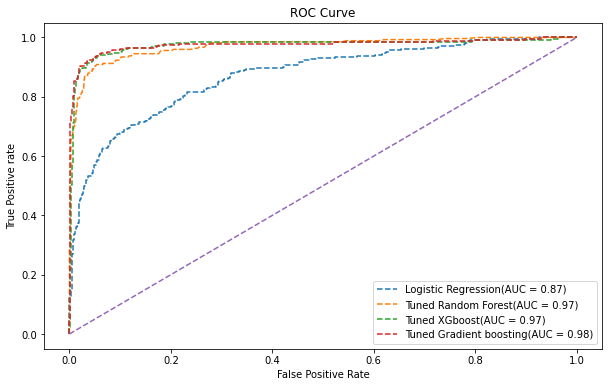

In [ ]:
plt.figure(figsize = (10,6))

plt.plot(fpr1, tpr1, linestyle='--', label='Logistic Regression(AUC = %0.2f)'%(auc_score1))
plt.plot(fpr2, tpr2, linestyle='--', label='Tuned Random Forest(AUC = %0.2f)'%(auc_score2))
plt.plot(fpr3, tpr3, linestyle='--', label='Tuned XGboost(AUC = %0.2f)'%(auc_score3))
plt.plot(fpr4, tpr4, linestyle='--', label='Tuned Gradient boosting(AUC = %0.2f)'%(auc_score4))

plt.plot(p_fpr, p_tpr, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

### Different Merics

In [ ]:
result_Table = pd.DataFrame({
    "Model":["Logistic Regression","Tuned Random Forest","Tuned XGBoosting","Tuned Gradient Boosting"],
    "Accuracy score":[0.809, 0.951, 0.964, 0.964],
    "AUC":[0.872, 0.971, 0.974, 0.975],
    "Precision score（Class1)": [0.447, 0.903, 0.902, 0.912],
    "Recall rate (Class1)": [0.748, 0.781, 0.876, 0.865]}).sort_values(by = ['Accuracy score', "Recall rate (Class1)"],ascending = False)

result_Table

,Model,Accuracy score,AUC,Precision score（Class1),Recall rate (Class1)
2,Tuned XGBoosting,0.964,0.974,0.902,0.876
3,Tuned Gradient Boosting,0.964,0.975,0.912,0.865
1,Tuned Random Forest,0.951,0.971,0.903,0.781
0,Logistic Regression,0.809,0.872,0.447,0.748


Gradient Boosting and XGBossting have the same accuracy score, while the recall rate for class 1 of XGBoosting is a little bit higher. We could see that after 1) solving the problem of imbalanced training data 2) adopting other methods, our best model XGBoosting does pretty well in terms of both the precision rate and recall rate.

### Important Features and Partial Dependence

**Feature Importance(Top10) suggested by our best model Gradient Boosting**

Text(0.5, 1.0, 'Feature Importance for Tuned XGBoosting classifier')

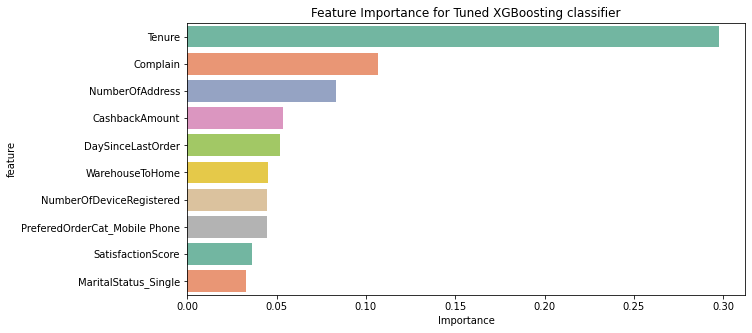

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = importance_gbc.head(10), x = 'Importance', y = 'feature', palette = 'Set2');
plt.title('Feature Importance for Tuned XGBoosting classifier')

**Look at partial dependence to identify relationships between Churn labels and important features.**

In [ ]:
from sklearn.inspection import PartialDependenceDisplay,partial_dependence

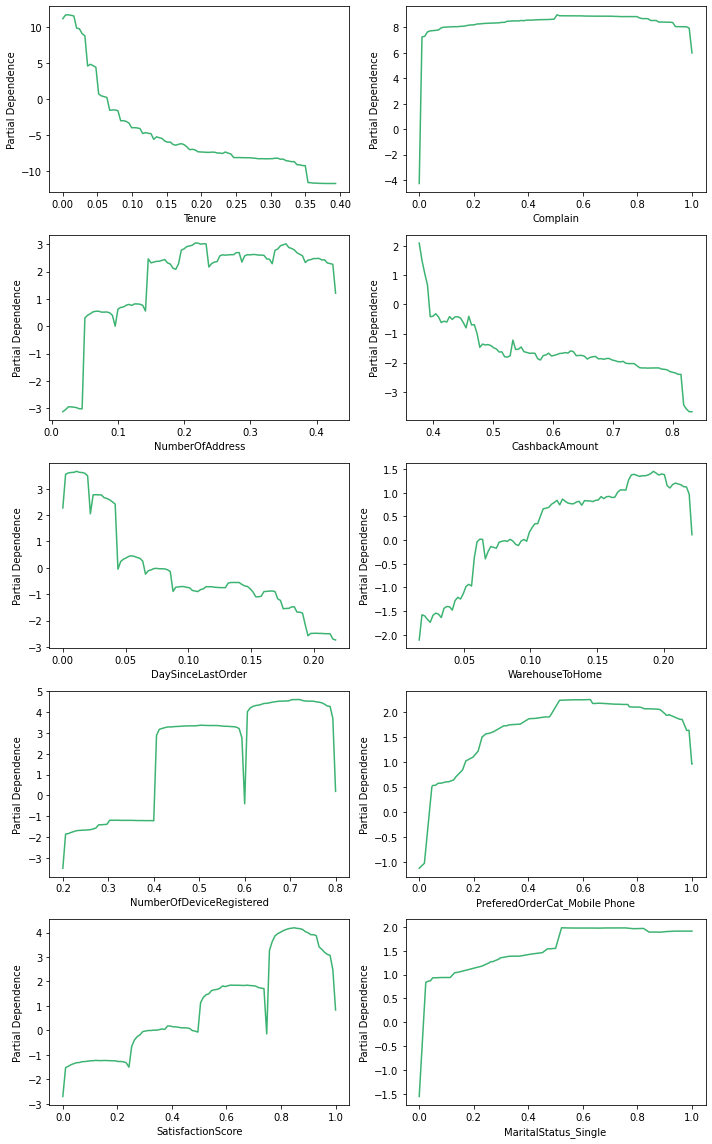

In [ ]:
TOP10_features_cols = list(importance_gbc.head(10).feature)
features = [X_train_ow.columns.get_loc(c) for c in TOP10_features_cols]

plt.figure(figsize = (10,16))

s = 1
for i in features:

    plt.subplot(5,2,s)
    x = partial_dependence(tuned_gbc,X_train_ow,i)[1][0]
    y = partial_dependence(tuned_gbc,X_train_ow,i)[0][0]
    
    
    sns.lineplot(x,y,color = "mediumseagreen")
    plt.xlabel(X_train_ow.columns[i])
    plt.ylabel("Partial Dependence")
    s += 1
plt.tight_layout()